In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
plt.rcParams['figure.dpi'] = 150
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=0)

In [2]:
from sklearn.linear_model import LogisticRegression

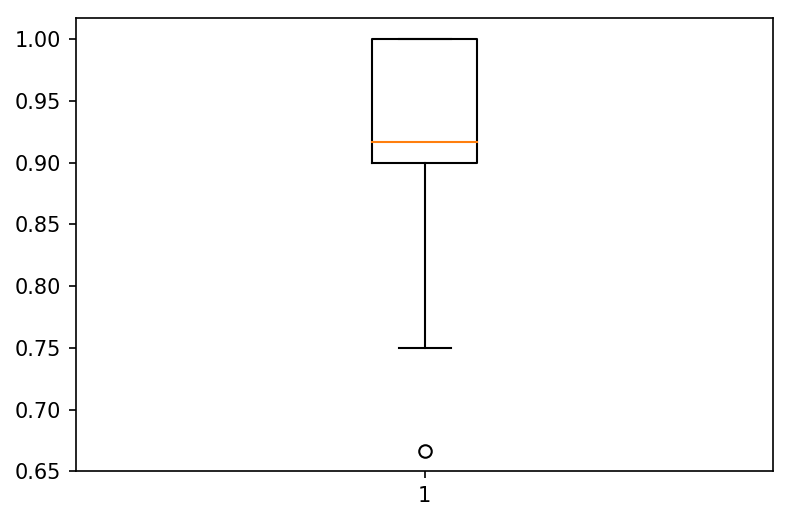

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=cv)
plt.boxplot(scores);

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_features=10)
pipe = make_pipeline(SelectFromModel(LogisticRegression()), LogisticRegression())
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('selectfrommodel', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [6]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(LogisticRegression)

/home/andy/anaconda3/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-05-17 16:33:47.560199. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

class TemplateClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y):

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    def predict(self, X):

        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
        return self.y_[closest]

/home/andy/anaconda3/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-05-17 16:41:49.504452. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [13]:
check_estimator(TemplateClassifier)

AssertionError: Error message does not include the expected string: 'fit'. Observed error message: "'TemplateClassifier' object has no attribute 'X_'"

/home/andy/anaconda3/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-05-17 16:41:24.382127. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
scoring = {'AUC Score': 'roc_auc', 'Precision': make_scorer(precision_score),
           'Recall': 'recall', 'F1 Score': 'f1'}

# Multiple metric GridSearchCV, best_* attributes are exposed for the scorer
# with key 'AUC Score' ('roc_auc')
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, cv=5, refit='AUC Score')
gs.fit(X, y)

In [ ]:
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca),
                       ('logistic', logistic)])


#Parameters of pipelines can be set using ‘__’ separated parameter names:
grid = dict(pca__n_components=[50, 100, 150, 250],
            logistic__C=[1e-4, 1.0, 10, 1e4],
            logistic__penalty=['l1', 'l2'])

# from sklearn.grid_search import GridSearchCV
import dask_searchcv as dcv

estimator = dcv.GridSearchCV(pipe, grid)

estimator.fit(X, y)